# A/B testing
## Chi-Square Test within the Montana Library case study

In this notebook we perform a chi-square test with the data from the Library of Montana University case study, applying a post-hoc correction to perform pairwise tests and find the true winner.

## Montana Library case study

The Library of Montana State University has a website that students use to find books and articles. This is what the homepage looks like:

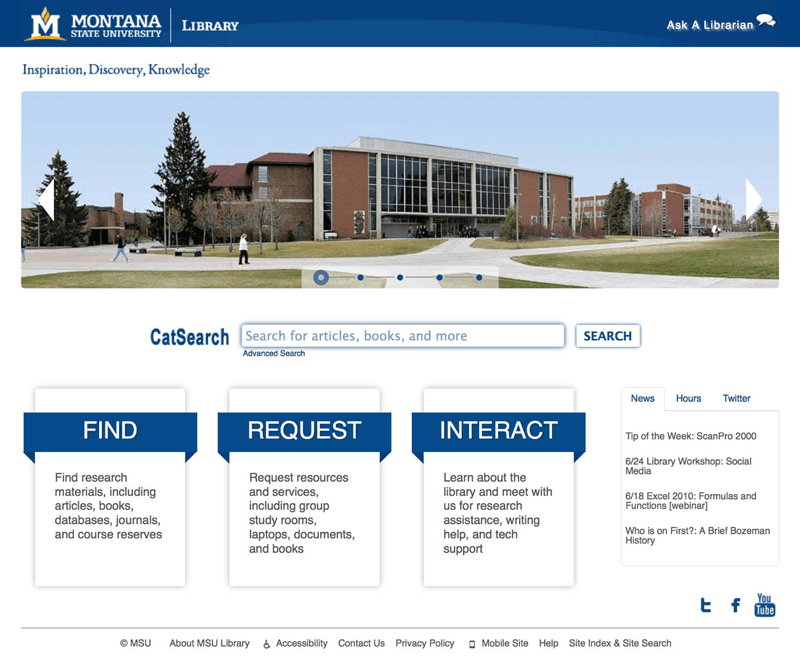

Below the library picture, there is a search bar and three big items: “Find”, “Request” and “Interact”. All three of them contain access to important information and services that the library prides itself in offering. However, the Website Analytics show that the “Interact” button has, ironically, almost no interactions:

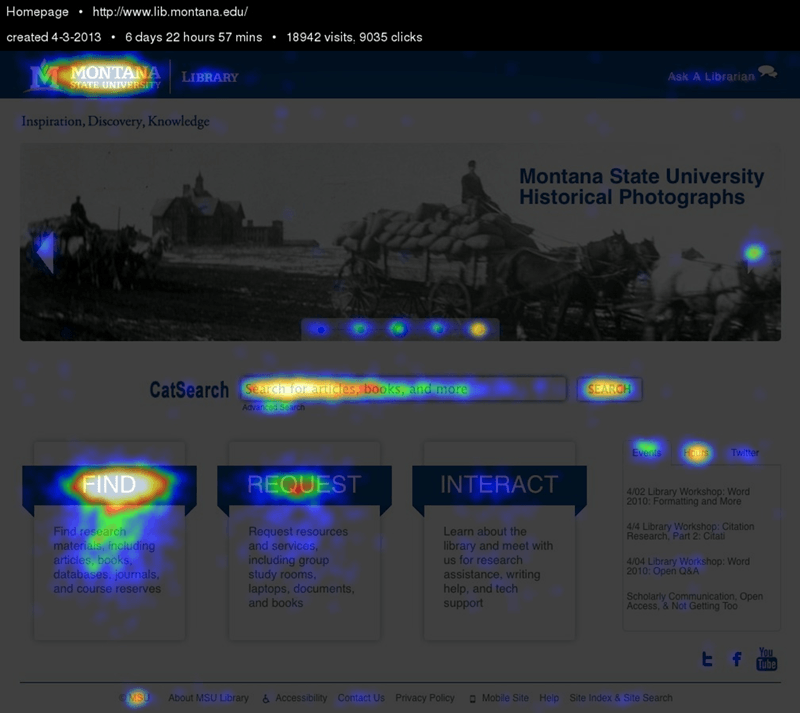

In order to make the "Interact" button more appealing, the MSU team decides to change its name to something more meaningful to the users.

After some user interviews and some brainstorming, the website team settled on 4 different new versions to test against the original “Interact” button:

- Connect
- Learn
- Help
- Services

Currently, the click-through rate (CTR) for "Interact" sits at around 2%, and the page has around 1650 visitors every day. With these numbers, a power calculator like this one (https://www.abtasty.com/sample-size-calculator/) can be used to decide on the length of the test. The length of the experiment was established at 21 days.

They hence set up an A/B test with these four additional button versions with a length of 21 days. It was carried out between May 29, 2013, and June 18, 2013. 

The most important metric they tracked was the click-through rate for the modified button. In addition, they logged the drop-off rate (percentage of visitors who exit the site from a given category page (like Interact, Connect, Learn, etc.) without exploring any of its subpages) and the homepage-return rate (how often users who visit specific category pages end up returning to the homepage).

The data from the experiment can be downloaded from here:

https://learn.wbscodingschool.com/wp-content/uploads/2023/03/MSU-ABTest-CrazyEgg.zip

While all the metrics will be relevant for the decision-making process, it was decided that for a version to be considered superior, a minimum increase in click-through rate of 30% had to be detected.

The hypotheses to be tested in the experiment are the following:

- **Null Hypothesis**: all versions have the same CTR.
- **Alternative Hypothesis**: there is a difference in the CTR for the different versions.

## Data exploration

- What was the click-through rate for each version?
- Which version was the winner?
- What were the drop-off and homepage-return rates for each version?

### Read in the data

In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [26]:
def read_in_data(version: str) -> pd.DataFrame:
    path = os.path.join(
        ".",
        f"data/CrazyEgg/Homepage {version}, 5-29-2013",
        f"Element list Homepage {version}, 5-29-2013.csv"
    )
    return pd.read_csv(path)

In [27]:
versions = [
    "Version 1 - Interact", 
    "Version 2 - Connect", 
    "Version 3 - Learn", 
    "Version 4 - Help", 
    "Version 5 - Services"
]

In [28]:
interact_df = read_in_data(versions[0])
connect_df  = read_in_data(versions[1])
learn_df    = read_in_data(versions[2])
help_df     = read_in_data(versions[3])
services_df = read_in_data(versions[4])

### Extract total visits & clicks

How many button clicks did each page get?

In [29]:
interact_clicks = int(interact_df.loc[interact_df["Name"]=="INTERACT", "No. clicks"])
connect_clicks = int(connect_df.loc[connect_df["Name"]=="CONNECT", "No. clicks"])
learn_clicks = int(learn_df.loc[learn_df["Name"]=="LEARN", "No. clicks"])
help_clicks = int(help_df.loc[help_df["Name"]=="HELP", "No. clicks"])
services_clicks = int(services_df.loc[services_df["Name"]=="SERVICES", "No. clicks"])

How many visits did each page get?

In [30]:
# Collecting this from the "Snapshot information" column, row 2:
interact_visits = 10283
connect_visits = 2742
learn_visits = 2747
help_visits = 3180
services_visits = 2064

In [31]:
click_data = pd.DataFrame(
    [[interact_clicks, connect_clicks, learn_clicks, help_clicks, services_clicks], 
     [interact_visits, connect_visits, learn_visits, help_visits, services_visits]],
    columns=["interact", "connect", "learn", "help", "services"],
    index=["click", "visit"]
)

click_data.loc["no_click"] = click_data.loc["visit"] - click_data.loc["click"]
click_data.loc["click_through_rate"] = round((click_data.loc["click"] / click_data.loc["visit"]) * 100, 2)
click_data.loc["version"] = ["A", "B", "C", "D", "E"]

### Click-through rate
Amount of clicks on the button divided by the total visits to the page. Selected as a measure of the initial ability of the category title to attract users.

In [32]:
click_data

,interact,connect,learn,help,services
click,42.0,53.0,21.0,38.0,45.0
visit,10283.0,2742.0,2747.0,3180.0,2064.0
no_click,10241.0,2689.0,2726.0,3142.0,2019.0
click_through_rate,0.41,1.93,0.76,1.19,2.18
version,A,B,C,D,E


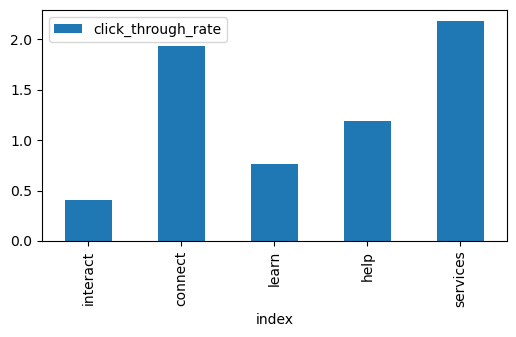

In [33]:
click_data.T.reset_index().plot(kind="bar", x="index", y="click_through_rate", figsize=(6,3));
# or:
# plt.bar(data=click_data.T.reset_index(), height="click_through_rate", x="index");

#### Result:
All tested versions perform better than the original version. The highest click through rate is achieved by version E, i.e. the "SERVICES" keyword.

## Statistics

### Hypotheses

- **H0**: 
    - The 5 different button versions are equally likely to be clicked.
- **H1**: 
    - There is at least one button version that receives significantly more or less clicks than the other versions.

### Chi-square test

Since we compare frequencies among multiple different groups, what we need is a chi-square test. We'll create a contingency table and compare the clicks and no_clicks between different website versions.

In [36]:
# Create a data frame for testing:
contingency_table = click_data.loc[["click", "no_click"]]
contingency_table

,interact,connect,learn,help,services
click,42.0,53.0,21.0,38.0,45.0
no_click,10241.0,2689.0,2726.0,3142.0,2019.0


In [37]:
# Perform the chi-square test:
chi_square_statistic, p_value, dof, expected_freq = chi2_contingency(contingency_table)

In [38]:
print(f"Test statistic: {chi_square_statistic}, \np-value: {p_value}, \ndegrees of freedom: {dof}")
print(f"\nExpected frequencies:\n {expected_freq}")

Test statistic: 96.7432353798328, 
p-value: 4.852334301093838e-20, 
degrees of freedom: 4

Expected frequencies:
 [[   97.3694804     25.96393224    26.01127712    30.11134374
     19.5439665 ]
 [10185.6305196   2716.03606776  2720.98872288  3149.88865626
   2044.4560335 ]]


There is at least one highly significant difference between the click rates of the different button versions.

We thus reject the null hypothesis.

### Post-hoc test (with Bonferroni correction)

The chi-square test does tell us there are differences between the website versions, however, it cannot tell us anything more specific, e.g. which website performs best. *Post-hoc tests* do pair-wise comparisons and can show us which versions performed better than others. We'll use a *Bonferroni correction* in order to deal with an increase of Type I error due to multiple statistical tests.

There is [a lovely wrapper](https://github.com/neuhofmo/chisq_test_wrapper) for calculating post hoc chi square tests. Props to *neuhofmo* on GitHub for this source code.

In [45]:
import chisq_test_wrapper # I downloaded the source and pasted it in this notebook's directory

In [46]:
chisq_test_wrapper.chisq_and_posthoc_corrected(contingency_table.T, correction_method="bonferroni")

Chi2 result of the contingency table: 96.74323537983278, p-value: 4.852334301093873e-20

Post-hoc chi2 tests results:
('interact', 'connect'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('interact', 'learn'): p_value: 0.025420; corrected: 0.254198 (*) reject: False
('interact', 'help'): p_value: 0.000001; corrected: 0.000009 (****) reject: True
('interact', 'services'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('connect', 'learn'): p_value: 0.000277; corrected: 0.002768 (***) reject: True
('connect', 'help'): p_value: 0.028088; corrected: 0.280882 (*) reject: False
('connect', 'services'): p_value: 0.618877; corrected: 1.000000 (ns) reject: False
('learn', 'help'): p_value: 0.125128; corrected: 1.000000 (ns) reject: False
('learn', 'services'): p_value: 0.000051; corrected: 0.000505 (****) reject: True
('help', 'services'): p_value: 0.007371; corrected: 0.073709 (**) reject: False


According to the post hoc test, there are significant differences for the following combinations:
- **'interact' - 'connect'**(****)
- **'interact' - 'help'** (****)
- **'interact' - 'services'** (****)
- **'connect' - 'learn'** (***)
- **'learn' - 'services'** (****)

### Conclusions

The button names *CONNECT* and *SERVICES* generate the most clicks.

Although *SERVICES* performs best, the two top button names are not significantly different from each other.

The recommendation would thus be to settle for either *CONNECT* or *SERVICES*.